## "Navigation" project solution report

The goal of the project is to create an agent that learns how to efficiently solve the ["reacher" environment](https://youtu.be/2N9EoF6pQyE). While active the agent is trying to approximate the policy that defines his behaviour and tries to maximize the performance in the context of the environment.

The reinforcement learning agent implementation follows the ideas of [arXiv:1509.02971](https://arxiv.org/abs/1509.02971) paper implementing a DDPG agent.

### DDPG agent

The algorithm help the agent to act in an environment with a goal of solving the task defined by the environment as well as explore the environment in order to improve the agent's behaviour. 

The algorithm runs in a loop iterating over the episodes of agent running inside of an environment instance as well as iterating over time steps of the enviornment instance.

At every time step the algorithm uses the previous experience and knowledge of the current state to make the agent take some action, receives a new state and then stores that whole interaction experience so the agent could use it to improve its performance.

The algorithm requires a function approximation mechanism in order to approximate 
* an action to take for the currently received state
* a "value" function of state-action pair into a value that will be received if the action is taken

Every several time steps (the number of steps is defined as an input parameter of an algorithm) the agent uses his stored experience to improve the knowledge of value function in the approximator.

In order to tackle the instability of the learning process the implementation has two pairs approximators with the results of one being used to calculate the error of another during the learning process. After several steps the approximators are swapped, so both are trained at the same time.

The agent exploits the initial lack of knowledge as well as [Ornstein–Uhlenbeck process](https://en.wikipedia.org/wiki/Ornstein–Uhlenbeck_process)-generated noise to explore the environment.

The explorative behaviour leads to action being randomly chosen from all possible in the current context actions and executed in an environment. 

When more knowledge is gathered the eplorative behaviour is shifted more to the exploitative so better scores are acquired.

### Policy approximator network

As the value function might be very complex we use a deep neural network to approximate it. Neural networks are known as [universal approximators](http://neuralnetworksanddeeplearning.com/chap4.html) so in theory having enough experiences to learn from is enough to approximate the value function with good enough precision. The challenge here is to select the neural network architecture as well as the learning approach.

The neural network chosen for the implementation takes the current state as an input and outputs the best approximated action possible within the environment. The action will deliver the highest expected value from the environment.

To make the agent't performance better the algorithm initiates the learning process every several steps when the approximator improves it's precision using the experiences recorded by the agent. The experiences from the agent's memory are used to calculate the difference between the values predicted by one approximator for the future state considering the reward after the experienced state (as it was mentioned before, two approximators are used to tackle the instabilities issues) and values considering actions proposed by the other approximator for the current state. The difference is used to calculate the loss for neural network's backpropagation process.

### Experience replay buffer

The agent has to persist his past experiences so it can improve it's future performance. A fixed-sized FIFO queue is used to do that. When the queue is filled the oldest experiences are removed so the fresh ones could be stored. At every learing iteration a number of experiences is randomly sample from the queue so in theory most of the experiences are used for the learning process.

## The results

The final hyperparameters selected for the demontration are following:



* Actor learning rate: 0.0001
* Critic learning rate: 0.0001
* Update rate: 1
* Batch size: 4096
* Memory size: 100000
* Gamma: 0.99
* Tau: 0.0001
* Adam weight decay: 0
* OU-Noise and gradient clipping disabled
* Number of policy estimation layers: 2 (33 -> 400 -> 300 -> 4 neurons)
* Number of q-value estimation layers: 2 (33 -> 400 -> 300 -> 1 neurons)

It took the network 10 episodes to be able to perform with not less than score of 30 as an average of 100 episodes.
The actor neural network weights are stored in [this file](hp_multi_agent_search_results/set12_weights_actor_episode_1000_seed_0.pth).
The critic neural network weights are stored in [this file](hp_multi_agent_search_results/set12_weights_critic_episode_1000_seed_0.pth).

The learning performance chart is following:

In [1]:
import pandas as pd
import seaborn as sb

In [2]:
sb.set(rc={'figure.figsize':(15,12)}, style="darkgrid")

[Text(0, 0.5, 'Score'), Text(0.5, 0, 'Episode')]

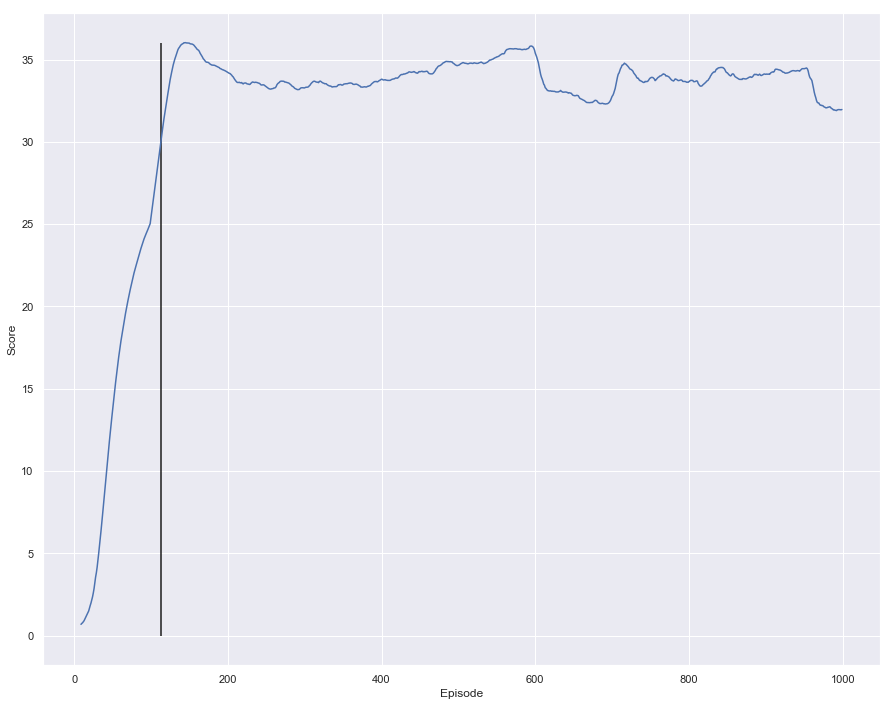

In [11]:
df = pd.read_json("hp_multi_agent_search_results/set12_results.json").transpose()[0].rolling(window = 100, min_periods=10).mean()
plt = sb.lineplot(data = df)
plt.vlines(df[df > 30].index.min(), ymin = 0, ymax = df.max())
plt.set(xlabel="Episode", ylabel="Score")

### Next steps

Most ideas I have regarding improvement of the current system come from papers and books on the subject. The most obvious ones are:

* do more grid search for hyperparameters of algorithm as well as neural network
* Implement a state to state predictor to improve the explorative capabilities of the agent